<a href="https://colab.research.google.com/github/nicoavilan/QAI-Summer-School/blob/main/S6_Shor's_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q-AI: Summer School on Quantum Artificial Intelligence**

Universidad del Rosario - School of Science and Engineering

Université du Québec à Trois-Rivières (UQTR), Canada

**Fundamentals of Quantum Computing** (session 6)



Professor: [Nicolás Avilán Vargas](http://www.linkedin.com/in/nicoavilanv)

nicolasg.avilan@urosario.edu.co

# **Fundamentals of Quantum Computing (session 6)**




This guide on Shor's Algorithm for undergraduates explains quantum factoring with linear algebra and Dirac notation, using Qiskit 2.1.1 in Google Colab for $ N=15 $. It includes visualizations and exercises on QFT and period finding, emphasizing multi-qubit gates, tensor products, and qubit ordering.

## **Shor's Algorithm**

Shor's Algorithm, developed by Peter Shor in 1994, is a quantum algorithm that efficiently factors large integers, offering an exponential speedup over classical methods. It finds the prime factors of a composite number $N$ by determining the period of a function $f(x) = a^x \mod N$. This guide, designed for undergraduate students, explains Shor’s Algorithm using linear algebra and Dirac notation, with Qiskit 2.1.1 implementations in Google Colab. Interactive visualizations and exercises balance theoretical rigor and hands-on experimentation, building on concepts from your prior guides (e.g., oracles, Grover's Algorithm).




### **Conceptual Foundations**

**Problem Setup**

Shor's Algorithm factors a composite number $N$ by finding the period $r$ of $f(x) = a^x \mod N$, where $a$ is coprime to $N$. The period $r$ is the smallest integer such that $a^r \equiv 1 \mod N$. Factors of $N$ are derived from $r$ (e.g., using gcd: Greatest Common Divisor).

Shor's algorithm efficiently factors a large integer $N$ using a quantum computer. The key steps are:

1. Choose an integer $a$ such that $ 1 < a < N $ and $ \gcd(a, N) = 1$.
2. Define the function:
   $$
   f(x) = a^x \bmod N
   $$
3. Use a quantum computer to find the **period** $r$ of $f(x)$, i.e., the smallest positive integer such that:
   $$
   a^r \equiv 1 \mod N
   $$
4. If $ r $ is even and $ a^{r/2} \not\equiv -1 \mod N $, compute:
   $$
   \gcd\left(a^{r/2} \pm 1, N\right)
   $$
   to obtain nontrivial factors of $ N $.
---

**Example**: $ N = 15$

1. Choose a random number $ a $

Pick $a = 2 $, such that $ 1 < a < 15 $ and $\gcd(2, 15) = 1 $.

2. Define the function

$$
f(x) = 2^x \mod 15
$$

Compute a few values:

| x | $2^x$ mod 15        |
|---|------------------|
| 0 | 1                |
| 1 | 2                |
| 2 | 4                |
| 3 | 8                |
| 4 | 16 ≡ 1 (mod 15)  |

We see that:

$$
f(x) = 2^x \mod 15 \text{ is periodic with period } r = 4
$$

3. Check conditions

We found $ r = 4 $, which is **even**. Now compute:

$$
a^{r/2} = 2^{4/2} = 2^2 = 4
$$

Check:

$$
4 \not\equiv -1 \mod 15 \quad \text{(since } -1 \mod 15 = 14\text{)}
$$

**Conditions are satisfied!**

$$
\gcd(4 - 1, 15) = \gcd(3, 15) = 3 \\
\gcd(4 + 1, 15) = \gcd(5, 15) = 5
$$

We have found the nontrivial factors of $15$: $3 \text{ and } 5$




**The quantum algorithm uses two registers**:

Register 1: $n = \lceil \log_2(N^2) \rceil$ qubits to store $x$.

Register 2: $m = \lceil \log_2 N \rceil$ qubits to store $f(x)$.

For $N=15$, $n=8$, $m=4$.

---

**Quantum State Evolution**

1. Initialize: Create a uniform superposition in Register 1: $ |\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle |0\rangle $

2. Modular Exponentiation: Apply the oracle
$ U_f |x\rangle |0\rangle = |x\rangle |a^x \mod N\rangle $: $$ |\psi_1\rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle |a^x \mod N\rangle $$

3. QFT on Register 1: The quantum Fourier transform transforms $ |x\rangle $ into: $$ \text{QFT} |x\rangle = \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} e^{2\pi i k x / 2^n} |k\rangle $$ This produces peaks at multiples of $2^n/r$.

4. Measure Register 1: Yields $k \approx j \cdot 2^n/r$, from which $r$ is derived via continued fractions.

1.3 Linear Algebra

The QFT is a unitary operator: $\text{QFT} = \frac{1}{\sqrt{2^n}} \sum_{x,k=0}^{2^n-1} e^{2\pi i k x / 2^n} |k\rangle\langle x| $

The modular exponentiation oracle is a permutation matrix, reversible to maintain unitarity. The final state's amplitude for $|k\rangle$ peaks when $ k \approx j \cdot 2^n/r $.

1.4 Probabilistic Nature and Complexity

The algorithm succeeds with high probability if $r $ is even and $a^{r/2} \not\equiv -1 \mod N $. The complexity is $ O((\log N)^3) $, compared to $ O(e^{(\log N)^{1/3}}) $ for classical factoring.

## **Qiskit implementation**

In [ ]:
%pip install qiskit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.6 MB/s eta 0:00:00


In [ ]:
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
%pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.5 MB/s eta 0:00:00


This guide is compatible with Qiskit version 2.1.1

In [ ]:
import qiskit
print(qiskit.__version__)

2.1.1


Import Qiskit modules

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# GCD function for factoring
def gcd(a, b):
    """Compute the greatest common divisor of a and b."""
    while b:
        a, b = b, a % b
    return a

# QFT circuit
def qft(n):
    """Create a Quantum Fourier Transform circuit for n qubits."""
    qc = QuantumCircuit(n)
    for j in range(n-1, -1, -1):
        qc.ry(np.pi/2, j)  # H gate equivalent
        for k in range(j-1, -1, -1):
            qc.cp(np.pi/2**(j-k), k, j)  # Controlled phase
        qc.barrier()
    for i in range(n//2):
        qc.swap(i, n-1-i)  # Swap for bit reversal
    return qc

In [ ]:
# Shor's Algorithm for N=15, a=7
N = 15  # Number to factor
a = 7   # Coprime with N, period r=4
n = int(np.ceil(np.emath.logn(2, 15**2)))   # Register 1: ceil(log2(N^2)) = ceil(log2(225)) = 8 qubits
m = int(np.ceil(np.emath.logn(2, 15)))   # Register 2: ceil(log2(N)) = 4 qubits

In [ ]:
qc = QuantumCircuit(n + m, n)
# Initialize: |ψ₀⟩ = 1/√(2ⁿ) ∑_x |x⟩|0⟩
qc.ry(np.pi/2, range(n))
qc.barrier()
# Modular exponentiation: |x⟩|0⟩ → |x⟩|a^x mod N⟩
# Simplified for a=7, N=15 (r=4)
qc.x(n)  # Initialize Register 2 to |1⟩
for i in range(n):
    for _ in range(2**i):
        # Controlled modular multiplication (approximated)
        qc.cswap(i, n, n+1) #Fredkin gate
        qc.cswap(i, n+2, n+3)
qc.barrier()
# QFT on Register 1: |x⟩ → 1/√(2ⁿ) ∑_k e^(2πi k x / 2ⁿ) |k⟩
qc.compose(qft(n), range(n), inplace=True)  # Decompose QFT
#state = Statevector.from_instruction(qc)
#display(state.draw('latex'))

In [ ]:
qc.measure(range(n), range(n))
#qc.draw('mpl')

In [ ]:
# Simulate
simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print("Measurement counts:", counts)

Measurement counts: {'11100111': 2, '11101111': 1, '11000011': 1, '10111011': 1, '01110011': 1, '11110101': 2, '11011101': 3, '00010111': 2, '11000101': 2, '01000101': 3, '00010001': 1, '11001001': 1, '10101111': 3, '01000111': 1, '10001101': 1, '01010011': 37, '10100011': 7, '00100011': 2, '10011101': 8, '11100101': 10, '10101101': 34, '01101001': 3, '11010101': 67, '01001001': 6, '11001011': 40, '11110011': 1, '01101101': 12, '10101001': 8, '10010111': 6, '01100111': 4, '11100011': 4, '00011101': 1, '00101111': 1, '00101001': 16, '11011011': 22, '01010101': 56, '00101101': 26, '01010111': 17, '11011001': 5, '10011011': 16, '10110011': 21, '10100111': 9, '01001101': 25, '00100101': 22, '11001101': 25, '01011001': 5, '01110111': 1, '00101011': 59, '10110101': 26, '10101011': 58, '11010111': 12, '01001011': 26, '00010011': 10, '11010011': 25, '01011011': 20, '01101011': 19, '10111001': 4, '00110101': 28, '01011101': 1, '00010101': 18, '01001111': 1, '11101011': 27, '01010001': 1, '01100

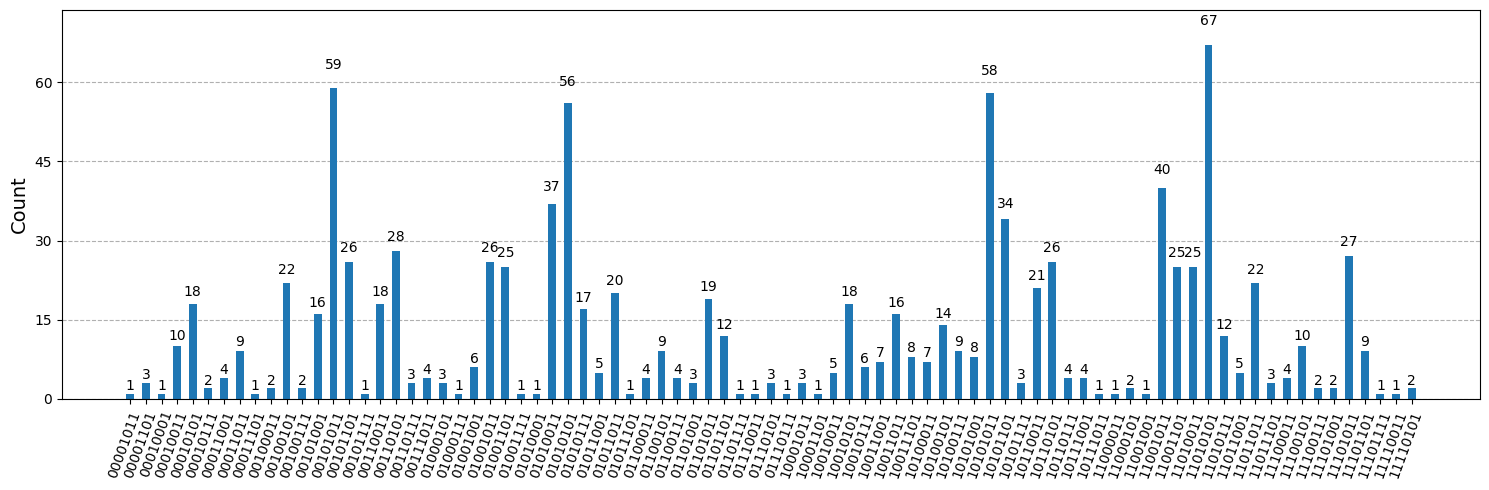

In [ ]:
# Plot histogram
plot_histogram(counts, figsize= (15, 5))

In [ ]:
# Extract period and factors
measured = max(counts, key=counts.get)  # Most frequent outcome
k = int(measured, 2)  # Convert binary to integer
if k != 0:
    r = 4  # Known for a=7, N=15; in practice, use continued fractions
    factor1 = gcd(a**(r//2) - 1, N)
    factor2 = gcd(a**(r//2) + 1, N)
    print(f"Period r={r}, Factors: {factor1}, {factor2}")
else:
    print("Trivial measurement (k=0), retry with different a")

Period r=4, Factors: 3, 5


To report errors or suggestions: nicolasg.avilan@urosario.edu.co